# Usage example: Simulated EEG multiverse

We first define the forking paths:

In [ ]:
from comet.multiverse import Multiverse

forking_paths = {
    "software": ["MNE", "FieldTrip", "EEGLab"],
    "resampling": [250, 500, 512],
    "stimulation": ["IAF", "9", "10", "11"],
    "electrode": ["Pz", "O1", "O2", "P3", "P4"],
}

The template script then adds some signal + noise to a baseline value to create artificial data that systematically variates with some decisions:

In [ ]:
def analysis_template():
    import comet
    import numpy as np

    base_value = 10
    if {{software}} == "EEGlab":
        base_value += 2
    if {{stimulation}} == "IAF":
        base_value += 5
    if {{electrode}} == "Pz":
        base_value += 7
    if {{stimulation}} == "IAF" and {{electrode}} == "Pz":
        base_value += 2

    # Generate 50 outcome values (mock differences in alpha power)
    power_diffs = [base_value + np.random.normal(0, 35) for _ in range(50)]

    result = {
        "power_diffs": [round(power_diff, 3) for power_diff in power_diffs],
    }

    comet.utils.save_universe_results(result)

We can then create and run the multiverse:

In [3]:
mverse = Multiverse(name="example_mv_eeg_sim")
mverse.create(analysis_template, forking_paths)
mverse.summary()
#mverse.run(parallel=10)

,Universe,Decision 1,Value 1,Decision 2,Value 2,Decision 3,Value 3,Decision 4,Value 4
0,Universe_1,software,MNE,resampling,250,stimulation,IAF,electrode,Pz
1,Universe_2,software,MNE,resampling,250,stimulation,IAF,electrode,O1
2,Universe_3,software,MNE,resampling,250,stimulation,IAF,electrode,O2
3,Universe_4,software,MNE,resampling,250,stimulation,IAF,electrode,P3
4,Universe_5,software,MNE,resampling,250,stimulation,IAF,electrode,P4
...,...,...,...,...,...,...,...,...,...
175,Universe_176,software,EEGLab,resampling,512,stimulation,11,electrode,Pz
176,Universe_177,software,EEGLab,resampling,512,stimulation,11,electrode,O1
177,Universe_178,software,EEGLab,resampling,512,stimulation,11,electrode,O2
178,Universe_179,software,EEGLab,resampling,512,stimulation,11,electrode,P3


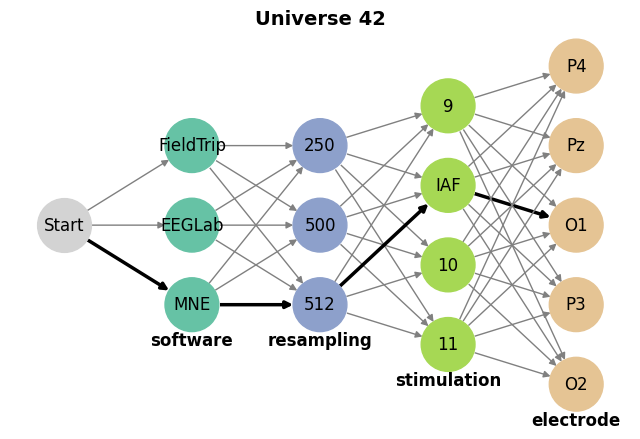

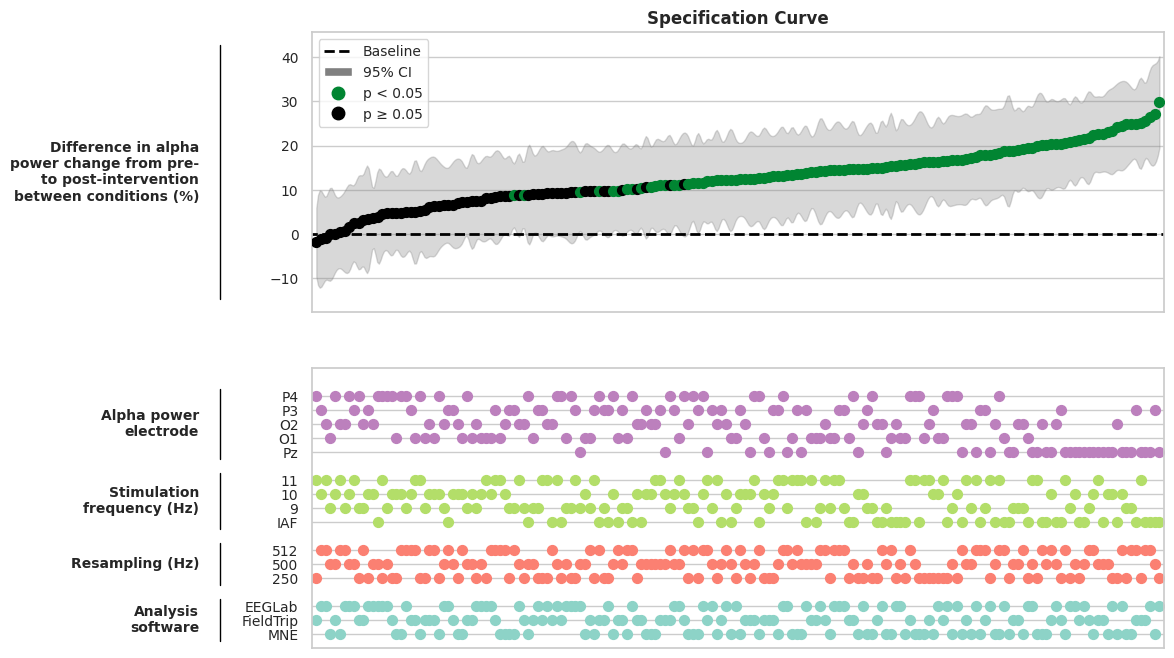

In [ ]:
from matplotlib import pyplot as plt

# Custom labels for the specification curve can be provided as a dict
name_map = {
    "power_diffs": "Difference in alpha\npower change from pre-\nto post-intervention\nbetween conditions (%)",
    "software": "Analysis\nsoftware",
    "stimulation": "Stimulation\nfrequency (Hz)",
    "electrode": "Alpha power\nelectrode",
    "resampling": "Resampling (Hz)"
}

mverse.visualize(universe=42)
mverse.specification_curve(measure="power_diffs", name_map=name_map, p_value=0.05, ci=95, smooth_ci=True, \
                               cmap="Set3", figsize=(11,8), fontsize=10, height_ratio=[1,1], ftype="pdf")

You can access the results from the multiverse analysis for either all universes, or for a single universe:

In [5]:
results = mverse.get_results()
print(results["universe_1"]["power_diffs"])

results = mverse.get_results(universe=1)
print(results["power_diffs"])

[59.029, 4.616, 70.225, -20.095, 81.684, -35.605, 73.162, 28.598, -5.386, 3.702, 20.478, 25.266, 10.45, 59.923, 66.419, 21.28, 4.131, 81.691, 82.904, -75.854, -33.496, -29.16, 55.163, -64.278, 13.029, 21.422, 65.526, 99.722, -53.677, -3.0, 83.436, 4.313, -36.06, -6.6, 65.048, -20.032, -1.139, -30.446, 76.404, -17.625, 35.452, -12.717, 70.576, 41.553, 8.985, -11.178, -3.026, -43.106, 84.821, 23.417]
[59.029, 4.616, 70.225, -20.095, 81.684, -35.605, 73.162, 28.598, -5.386, 3.702, 20.478, 25.266, 10.45, 59.923, 66.419, 21.28, 4.131, 81.691, 82.904, -75.854, -33.496, -29.16, 55.163, -64.278, 13.029, 21.422, 65.526, 99.722, -53.677, -3.0, 83.436, 4.313, -36.06, -6.6, 65.048, -20.032, -1.139, -30.446, 76.404, -17.625, 35.452, -12.717, 70.576, 41.553, 8.985, -11.178, -3.026, -43.106, 84.821, 23.417]
